In [59]:
import pandas as pd # data processing 
import matplotlib.pyplot as plt # plotting 
import numpy as np # linear algebra 
import seaborn as sns 

# tool for reading data csv file (faster than pandas and reads from .zip)
import datatable as dt 

# import kaggle 

# colored output text
from termcolor import colored

import re
import string 

from bs4 import BeautifulSoup

from wordcloud import WordCloud, STOPWORDS

# Silent Warnings 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')



### Dataset in use 
### https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

In [3]:
fake_df1 = pd.read_csv("./archive(3)/Fake.csv")
real_df1 = pd.read_csv("./archive(3)/True.csv")

### Quick exploratory analysis of Fake News DF

In [4]:
fake_df1.head(6)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"


In [5]:
fake_df1.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [6]:
fake_df1.shape

(23481, 4)

In [7]:
fake_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
fake_df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

#### Let's find and remove duplicates in Fake DF

In [9]:
duplicate = fake_df1['text'][fake_df1['text'].duplicated()].index
result = f"Found {len(duplicate)} duplicates in {fake_df1.shape[0]} samples"
print(colored(result, 'blue', attrs=['bold']))

Found 6026 duplicates in 23481 samples


In [10]:
# remove duplicates 

fake_df1.drop(index=duplicate, inplace=True)
fake_df1.shape


(17455, 4)

In [11]:
fake_df1['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News'],
      dtype=object)

### Quick explanatory analysis of Real News DF

In [12]:
real_df1.head(6)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"


In [13]:
real_df1.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [14]:
real_df1.shape

(21417, 4)

In [15]:
real_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [16]:
real_df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

#### Let's Find and remove duplicates in Real DF

In [17]:
duplicate = real_df1['text'][real_df1['text'].duplicated()].index
result = f"Found {len(duplicate)} duplicates in {real_df1.shape[0]} samples"
print(colored(result, 'blue', attrs=['bold']))

Found 225 duplicates in 21417 samples


In [18]:
real_df1.drop(index=duplicate, inplace=True)
real_df1.shape

(21192, 4)

In [19]:
real_df1['subject'].value_counts()

politicsNews    11214
worldnews        9978
Name: subject, dtype: int64

### Let's add 'true' label for easier reference where Fake = 0, Real = 1

In [20]:
# label the diff df for easier ref

fake_df1['true'] = 0
real_df1['true'] = 1

# print new shape 
print(fake_df1.shape)
print(real_df1.shape)

(17455, 5)
(21192, 5)


In [21]:
# just to see 

real_df1.describe


<bound method NDFrame.describe of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reut

In [69]:
# concat the two datasets  

raw_df = pd.concat([fake_df1, real_df1], ignore_index = True)
raw_df

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
38642,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
38643,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
38644,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
38645,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [23]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38647 entries, 0 to 38646
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38647 non-null  object
 1   text     38647 non-null  object
 2   subject  38647 non-null  object
 3   date     38647 non-null  object
 4   true     38647 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [24]:
# How many are real, and how many are fake? 

raw_df.true.value_counts()

1    21192
0    17455
Name: true, dtype: int64

### Let's visualise raw_df before any cleaning to allow comparison 

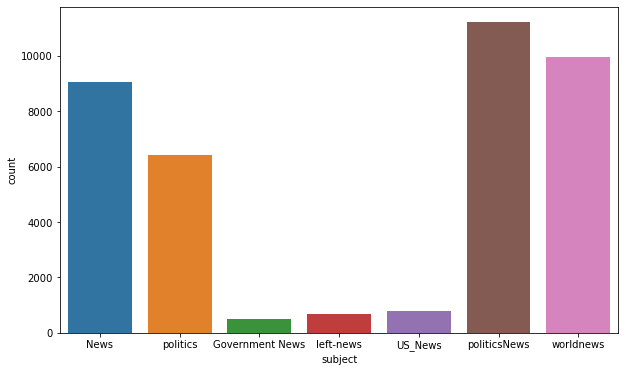

In [25]:
# spread of information sources/ subjects in raw df 

plt.figure(figsize=(10,6))
sns.countplot('subject', data = raw_df)
plt.show()

In [26]:
# group by subject and by true score
raw_df.groupby('subject')['true'].count()

subject
Government News      514
News                9050
US_News              783
left-news            683
politics            6425
politicsNews       11214
worldnews           9978
Name: true, dtype: int64

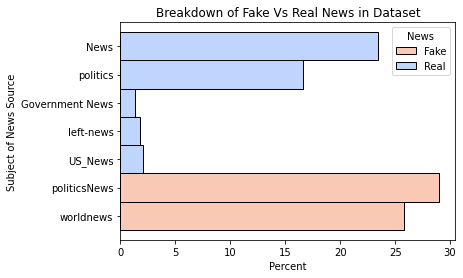

In [27]:
# plot the grouped with seaborn and matplotlib
sns.histplot(raw_df, y='subject', hue ='true', 
           stat = 'percent', multiple = 'stack',
           palette = 'coolwarm')
plt.ylabel('Subject of News Source')
plt.title('Breakdown of Fake Vs Real News in Dataset')
plt.legend(title='News', loc='upper right', labels = ['Fake', 'Real'])

#### Let's change politicsNews to politics, News to worldnews and plot again
#### This allows easier comparison of news subject for fake and real news 

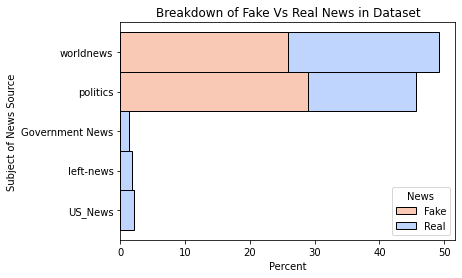

In [28]:
raw_df['subject'].replace({'politicsNews':'politics', 
                           'News':'worldnews'}, inplace = True)

sns.histplot(raw_df, y='subject', hue ='true', 
           stat = 'percent', multiple = 'stack',
           palette = 'coolwarm')
plt.ylabel('Subject of News Source')
plt.title('Breakdown of Fake Vs Real News in Dataset')
plt.legend(title='News', loc='lower right', labels = ['Fake', 'Real'])

#### Let's make a word cloud of the text for quick comparison of article content before cleaning and processing. 


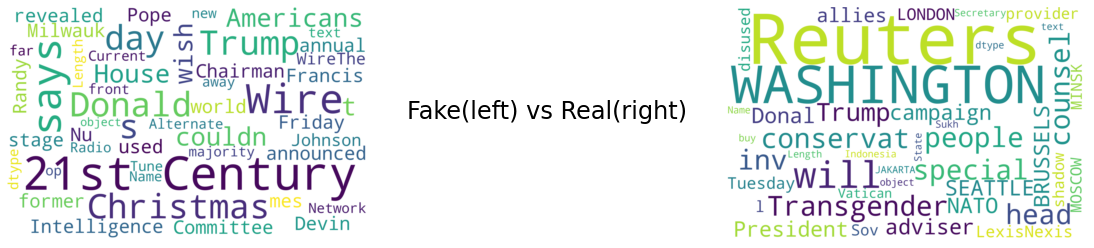

In [29]:
fake_text = raw_df.text[raw_df['true']==0]
real_text = raw_df.text[raw_df['true']==1]

def plot_fake_vs_real(fake, real):
    wordcloud_fake = WordCloud(width = 2000, height = 1300,
                              background_color = 'white', 
                              stopwords = STOPWORDS).generate(str(fake))
    wordcloud_real = WordCloud(width = 2000, height = 1300,
                              background_color = 'white', 
                              stopwords = STOPWORDS).generate(str(real))
    
    # plot WordCloud img 
    plt.subplots(figsize=(15,6))
    
    plt.subplot(1,3,1)
    plt.imshow(wordcloud_fake, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    plt.suptitle("Fake(left) vs Real(right)", y=0.5, va='center', size = 24)
    
    plt.subplot(1,3,3)
    plt.imshow(wordcloud_real, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

    
plot_fake_vs_real(fake_text, real_text)
plt.show()  

    

#### Let's add a wordcloud of title words too, to show what words are used as click / read-bait

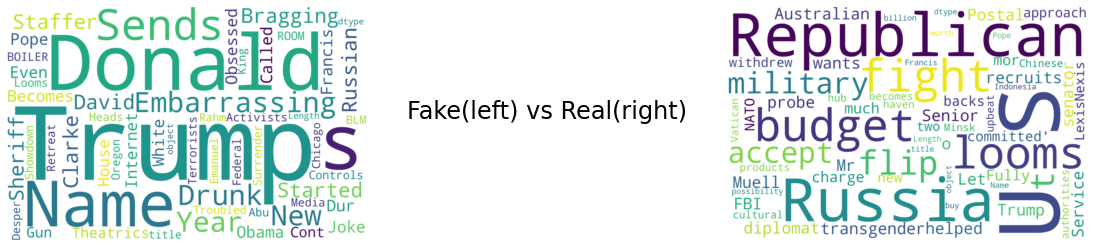

In [30]:
fake_title = raw_df.title[raw_df['true']==0]
real_title = raw_df.title[raw_df['true']==1]

plot_fake_vs_real(fake_title, real_title)
plt.show()

## Data Cleaning 

Df needs cleaning. Ultimate Goal is:  
* Check for null values
* check for empty spaces 
* check for nonsense texts 
* remove urls, https, special characters and numbers 
* remove REUTERS()


In [31]:
# check raw_df starting point
raw_df.shape

(38647, 5)

In [32]:
# check null values
raw_df.isnull().sum()

title      0
text       0
subject    0
date       0
true       0
dtype: int64

In [70]:
duplicate = raw_df['text'][raw_df['text'].duplicated()].index
result = f"Found {len(duplicate)} duplicate in {raw_df.shape[0]} samples"
print(colored(result, 'blue', attrs=['bold']))

Found 1 duplicate in 38647 samples


In [71]:
raw_df.drop(index=duplicate, inplace=True)
raw_df.shape


(38646, 5)

In [72]:
# how many have <CITY>(Reuters) pattern in text 
# pattern = 0+ uppercase letters, 0 or 1 spaces, (Reuters)

pattern = r'[A-Z]* ?\(Reuters\)'

test_df = raw_df['text'].copy().to_frame()
test_df['patterns'] = test_df['text'].map(lambda x: len(re.findall(pattern, x)))

result = f"{test_df.groupby('patterns')['text'].count()[1]} of {raw_df.shape[0]} samples have <City> (REUTERS) pattern."
print(colored(result, 'blue', attrs=['bold']))


21028 of 38646 samples have <City> (REUTERS) pattern.


In [73]:
# remove pattern <CITY> (Reuters)

raw_df['text'] = raw_df['text'].map(lambda x: re.sub(pattern, '', x))

In [74]:
raw_df.sample(10)

,title,text,subject,date,true
18186,"Xi says China to be more open, transparent to ...",- Chinese President Xi Jinping said on Thursd...,politicsNews,"November 9, 2017",1
2517,REPORT: Intelligence Community Declares WAR O...,Donald Trump has finally pushed the intelligen...,News,"February 15, 2017",0
28269,Puerto Rico senate approves bill to restructur...,- The Puerto Rico senate has approved the PRE...,politicsNews,"February 11, 2016",1
12008,ANGELA MERKEL Running For Re-Election Makes St...,ANGELA Merkel today completed an astonishing U...,politics,"Dec 6, 2016",0
461,Kellyanne Conway Immediately Regrets Defendin...,White House adviser Kellyanne Conway should ha...,News,"August 31, 2017",0
4449,RESULTS ARE IN: New Post-Debate Poll Shows MA...,It s been a couple days since the first presid...,News,"September 28, 2016",0
6588,‘Donald Trump’ Joins A Pro-Immigration Rally ...,"On Sunday, thousands of protesters came togeth...",News,"May 2, 2016",0
9884,WATCH: FOX and FRIENDS Host BRIAN KILMEADE Imm...,You almost have to feel sorry for Whoopi Goldb...,politics,"Sep 17, 2017",0
35213,Bolivia's Morales leads 'Che' homage 50 years ...,"VALLEGRANDE, Bolivia - Thousands gathered on M...",worldnews,"October 9, 2017",1
28604,Exclusive: Clinton plans ad blitz as primaries...,NEW YORK - Democrat Hillary Clinton plans to p...,politicsNews,"January 15, 2016",1


In [75]:
raw_df.describe(include='all')

,title,text,subject,date,true
count,38646,38646,38646,38646,38646.000000
unique,38270,38646,7,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,Donald Trump just couldn t wish all Americans ...,politicsNews,"December 6, 2017",NaN
freq,14,1,11213,166,NaN
mean,NaN,NaN,NaN,NaN,0.548336
std,NaN,NaN,NaN,NaN,0.497665
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


In [76]:
# Check for empty rows 

raw_df[raw_df['text'].str.strip()=='']

,title,text,subject,date,true
10920,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",0
12032,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,,politics,"Dec 1, 2016",0


In [77]:
# drop the above empty rows 

raw_df = raw_df[raw_df['text'].str.strip()!='']
raw_df.shape

(38644, 5)

#### Confirm dropped unecessary rows. 

In [78]:
# text has bool true so should return false if empty 
# just another way to check for null values 

all(raw_df['text'].astype(bool))

True

### Expand into day, month, year

In [79]:
# date -> datetime

def get_day_mon_yr(date):
    try: 
        return pd.to_datetime(date, infer_datetime_format = True)
    except:
        return np.nan
    
raw_df['Date'] = raw_df.apply(lambda row: get_day_mon_yr(row['date']), axis = 1)
raw_df.sample(5)

,title,text,subject,date,true,Date
25711,Obama highlights climate progress at home befo...,- Preserving natural places will help the wor...,politicsNews,"August 31, 2016",1,2016-08-31
37072,Ultra-Orthodox protesters arrested in violent ...,- Jewish ultra-Orthodox demonstrators protest...,worldnews,"September 17, 2017",1,2017-09-17
21000,FBI director search: back to drawing board for...,(This version of the May 24 story corrects pa...,politicsNews,"May 24, 2017",1,2017-05-24
10667,CNN BLASTED FOR FAKE NEWS ON TRUMP…Finally Iss...,WOW! Not until people like Brett Hume tweeted ...,politics,"Jun 8, 2017",0,2017-06-08
25580,Loss of 'March Madness' games could hurt North...,"WINSTON-SALEM, N.C. - North Carolina Governor ...",politicsNews,"September 13, 2016",1,2016-09-13


In [80]:
# check null values (none expected)

raw_df.isnull().sum()

title      0
text       0
subject    0
date       0
true       0
Date       6
dtype: int64

In [81]:
# check where Date is NaN 

raw_df[raw_df['Date'].isna()]

,title,text,subject,date,true,Date
9357,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,0,NaT
15121,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,0,NaT
15122,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0,NaT
15424,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
15425,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
16128,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0,NaT


In [82]:
raw_df.shape

(38644, 6)

In [83]:
# drop the NaN values 

raw_df.dropna(inplace=True)
print(raw_df.shape)
raw_df.sample(5)

(38638, 6)


,title,text,subject,date,true,Date
21633,Trump vows to back U.S. dairy farmers in Canad...,- U.S. President Donald Trump promised on Tue...,politicsNews,"April 18, 2017",1,2017-04-18
21966,Trump says new trade orders set stage for manu...,- U.S. President Donald Trump on Friday direc...,politicsNews,"March 31, 2017",1,2017-03-31
22073,Trump tax plan faces rockier road after bruisi...,- The White House will take a lead role in cr...,politicsNews,"March 27, 2017",1,2017-03-27
23022,Trump questions lawmakers' efforts to curb ass...,- President Donald Trump said on Tuesday ther...,politicsNews,"February 7, 2017",1,2017-02-07
2994,GOP Congressman Hosts Repeal Obamacare Town H...,Rep. Mike Coffman (R-Colorado) is one of the R...,News,"January 16, 2017",0,2017-01-16


In [84]:
# Add cols for day, month, year 

raw_df['day']= raw_df.apply(lambda row: row['Date'].day, axis=1)
raw_df['month']= raw_df.apply(lambda row: row['Date'].month, axis =1)
raw_df['year']= raw_df.apply(lambda row: row['Date'].year, axis = 1)

# drop redundant date cols
raw_df.drop(['date','Date'], axis=1, inplace=True)
raw_df.sample(3)

,title,text,subject,true,day,month,year
14537,Disturbing Uncovered Emails From Huma Abedin B...,How quickly the Democrats have forgotten about...,politics,0,17,11,2015
2145,Comey GOING PUBLIC With Russia/Trump Investig...,FBI Director James Comey could very likely be ...,News,0,14,3,2017
2739,WATCH: Trump ‘Honors’ Black History Month By ...,It s the first day of Black History Month and ...,News,0,1,2,2017


#### Let's plot the correlation between date and target 

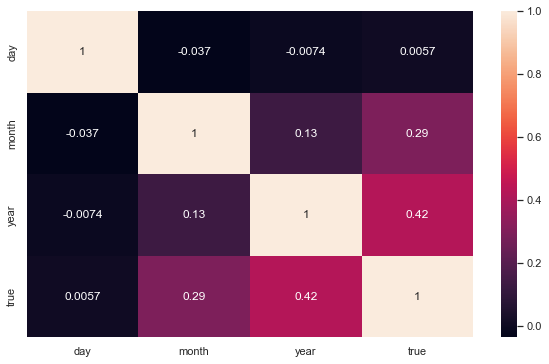

In [85]:
sns.heatmap(raw_df[['day', 'month', 'year', 'true']].corr(), annot=True)
sns.set(rc={'figure.figsize':(10,6)})


### Check for links in text/ instead of text 

In [86]:
# start with http, ? mean o or one s (https), ://, [^\n ]* any characters except: '\n' (newline), ' ' (0 or more times)
pattern = r'https?://[^\n ]*'

# find how many samples have links in text
test_df = raw_df['text'].copy().to_frame()
test_df['patterns'] = test_df['text'].map(lambda x: len(re.findall(pattern, x)))

text = f"{test_df.groupby('patterns')['text'].count()[1]} of {raw_df.shape[0]} samples have a link in them"
print(colored(text, 'blue', attrs=['bold']))


1900 of 38638 samples have a link in them


In [87]:
# remove links 
raw_df['text'] = raw_df['text'].map(lambda x: re.sub(pattern, '', x))

In [88]:
#  check how many strings had just the link in text columns 

text = f"{raw_df.text[raw_df['text'].str.strip()==''].count()} samples had links instead of news text"
print(colored(text, 'blue', attrs=['bold']))

raw_df[raw_df['text'].str.strip()==''].sample(5)

48 samples had links instead of news text


,title,text,subject,true,day,month,year
11467,FULL INTERVIEW: PRESIDENT TRUMP Nails It On Im...,,politics,0,28,2,2017
11896,‘YOU’RE A SEXIST PIG!’ FEMINIST BATTLES Tucker...,,politics,0,24,12,2016
11588,TUCKER CARLSON Outs Human Rights Exec. Directo...,,politics,0,9,2,2017
11271,TERRORISM EXPERT SEBASTIAN GORKA On What Next ...,,politics,0,26,3,2017
11485,WOW! TUCKER AND JESSE Destroy The Liberal Kook...,,politics,0,26,2,2017


In [89]:
# remove the 48 samples without text
raw_df = raw_df[raw_df['text'].str.strip()!='']
raw_df.shape

(38590, 7)

### Unique chars in text 

#### Let's plot the length of unique characters in the text, and 'true-value'

In [53]:
# count unique alphabet characters in text of each article 

def unique_char_num(string): 
    lower_str = string.lower()
    alpha = re.sub(r'[^a-z]','',lower_str)
    unique_ch = set(list(alpha))
    n_unique_ch = len(unique_ch)
    return n_unique_ch 

temp_df = raw_df[['text', 'true']].copy()
temp_df['unique_char'] = temp_df.text.map(lambda x: unique_char_num(x))
temp_df.head()

,text,true,unique_char
0,Donald Trump just couldn t wish all Americans ...,0,25
1,House Intelligence Committee Chairman Devin Nu...,0,24
2,"On Friday, it was revealed that former Milwauk...",0,25
3,"On Christmas day, Donald Trump announced that ...",0,26
4,Pope Francis used his annual Christmas Day mes...,0,25


In [54]:
# sort into descending order by unique_char

to_plot = temp_df.sort_values(by='unique_char', ascending=False).reset_index()

# add text length col to DF 
to_plot['text_len']= to_plot.text.map(lambda x: len(x))
to_plot

,index,text,true,unique_char,text_len
0,9872,President Trump was right again! His campaign ...,0,26,2778
1,29330,- Neither of Peru s two vice presidents would...,1,26,4034
2,29344,- The top U.N. human rights official has said...,1,26,2944
3,29343,- British Prime Minister Theresa May will pit...,1,26,2991
4,10111,Katie Couric s career has been pretty much in ...,0,26,1073
...,...,...,...,...,...
38585,12407,Via: GP,0,5,7
38586,11113,Enjoy:,0,5,6
38587,11846,Via: WT,0,5,7
38588,11676,Watch:,0,5,7


<AxesSubplot:xlabel='text_len', ylabel='unique_char'>

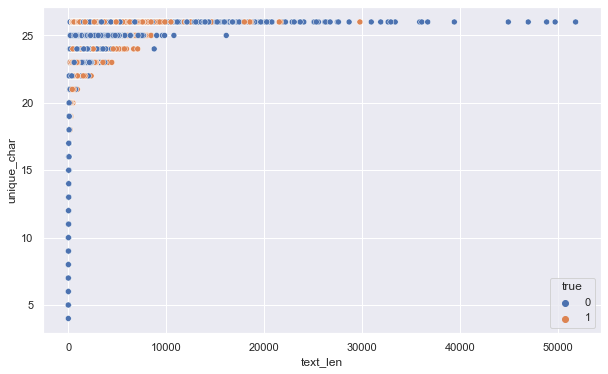

In [54]:
sns.scatterplot(data=to_plot, x='text_len', 
                y='unique_char', hue='true')  

In [ ]:
line1= f"{to_plot[to_plot['unique_char']<20].count()[0]} articles used less than 20 unique characters in their text"
line2= f"{to_plot[to_plot['unique_char']<20].max()} is the longest piece of text that had less than 20 unique characters"
line3= f"{to_plot[to_plot['unique_char']>=20].mean().astype(int)} is the average length of the text, where the article had 20 or more unique characters"

print(colored(line1, 'green', attrs=['bold']))
print(colored(line2, 'blue', attrs=['bold']))
print(colored(line3, 'red', attrs=['bold']))

In [90]:
raw_df.sample(3)

,title,text,subject,true,day,month,year
34211,North Korea warns states: Don't join any U.S. ...,UNITED - North Korea warned countries at the ...,worldnews,1,16,10,2017
20004,Top Senate Democrat warns Trump over replacing...,- The top Democrat in the U.S. Senate warned ...,politicsNews,1,25,7,2017
1450,‘Pay Bribes Here’ Projected On Trump Hotel,"Last night, Trump International Hotel in Washi...",News,0,16,5,2017


In [91]:
# function to remove HTML tags 

def remove_tags(text):
    
    # parse html content
    soup=BeautifulSoup(text, "html.parser")
    
    for data in soup(['style','script']):
        # remove tagss 
        data.decompose()
        
    # return data be retrieveing tag content 
    return ' '.join(soup.stripped_strings)

In [92]:
raw_df['text'] = raw_df['text'].map(lambda x: remove_tags(x))

#### Remove all special characters and numbers. Fold text to Lowercase

In [93]:
# casefold 
raw_df['text'] = raw_df['text'].map(lambda x: x.casefold())


In [94]:
# punctuation 

def remove_punctuation_spec_char(text_):
    punctuation = string.punctuation
    text_ = ' '.join([word for word in text_.split() if word not in punctuation])
    text_ = ' '.join([re.sub(r'[^a-zA-Z]','',word) for word in text_.split()])
    return text_

raw_df['text'] = raw_df['text'].map(lambda x: remove_punctuation_spec_char(x))

In [95]:
raw_df.sample(3)

,title,text,subject,true,day,month,year
35674,Iraqi Kurds face more sanctions after calling ...,erbil iraq iraq s autonomous kurdistan region ...,worldnews,1,3,10,2017
15549,BREAKING: Black Caucus Chair Threatens Over “C...,a spat between black lawmakers and republicans...,Government News,0,10,1,2017
19835,Scaramucci drama has no bearing on pending Sky...,new anthony scaramuccis swift exit as us presi...,politicsNews,1,31,7,2017


In [96]:
cleaned_df = raw_df.copy()
cleaned_df.to_csv('cleaned_news.csv', index=False, encoding='utf-8')

## To do list:
* Sentiment analysis
* ML and Modelling 
* Write Project Report 